In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)
train_dir     = '../OCT2017/train/'
test_dir      = '../OCT2017/test/'
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(299, 299), \
                                                    batch_size=128, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(299, 299), \
                                                    batch_size=128, class_mode='categorical')

Found 83484 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [3]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)
# Get the output layer from the pre-trained Inception V3 model
x = base_model.output

# Now, add new layers that will be trained with our data
# These layers will be randomly initialized
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Get the final Model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers from the original base model so that we don't update the weights
for layer in base_model.layers:
    layer.trainable = False

In [4]:
adam = optimizers.adam(lr=0.001)
# Compile the new model
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Setup a callback to save the best model
callbacks = [keras.callbacks.ModelCheckpoint('model.{epoch:02d}-{val_acc:.2f}.hdf5', monitor='val_acc',\
 verbose=1, save_best_only=True, mode='max', period=1)]

# Fit the data and output the history
history = model.fit_generator(train_generator, verbose=1, steps_per_epoch=len(train_generator), epochs=10, \
 validation_data=test_generator, validation_steps=len(test_generator), callbacks=callbacks)

Epoch 1/10
653/653 [==============================] - 727s 1s/step - loss: 0.5927 - acc: 0.7820 - val_loss: 0.5100 - val_acc: 0.7950
Epoch 2/10
653/653 [==============================] - 719s 1s/step - loss: 0.4885 - acc: 0.8186 - val_loss: 0.4344 - val_acc: 0.8210
Epoch 3/10
653/653 [==============================] - 719s 1s/step - loss: 0.4688 - acc: 0.8265 - val_loss: 0.3821 - val_acc: 0.8460
Epoch 4/10
653/653 [==============================] - 720s 1s/step - loss: 0.4552 - acc: 0.8311 - val_loss: 0.3084 - val_acc: 0.9050
Epoch 5/10
653/653 [==============================] - 719s 1s/step - loss: 0.4421 - acc: 0.8368 - val_loss: 0.3405 - val_acc: 0.8670
Epoch 6/10
653/653 [==============================] - 720s 1s/step - loss: 0.4389 - acc: 0.8369 - val_loss: 0.3659 - val_acc: 0.8570
Epoch 7/10
653/653 [==============================] - 720s 1s/step - loss: 0.4215 - acc: 0.8439 - val_loss: 0.3037 - val_acc: 0.8970
Epoch 8/10
653/653 [==============================] - 721s 1s/step - 

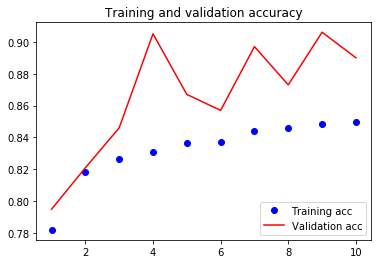

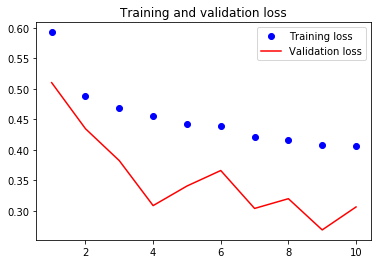

In [6]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', color='red', label='Validation acc')
    plt.legend()
    plt.show()

    plt.figure()
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', color='red', label='Validation loss')
    plt.legend()
    plt.show()
    return acc, val_acc, loss, val_loss

acc, val_acc, loss, val_loss = plot_history(history)